This short example uses the ICEYE <a href="https://github.com/iceye-ltd/icecube">ICEcube library</a> and inherents it's dependencies. Install ICEcube using the <a href="https://iceye-ltd.github.io/icecube/installation/">installation instructions</a>.

You can easily download an ICEYE image here: https://www.iceye.com/lp/example-strip-sar-dataset-acre-brazil. This data is a set of time-series data over Acre, Brazil over a forested region of the Amazon.

Learn to uce the ICEcube library to read in the data (at least 1 image), and run a (rather naive and meaingless) kmeans clustering to try to classify like pixels in either the complex or real domain. This is just an exercise to show you how to handle the data arrays and start thinking about techniques you could leverage to assess patterns in the data.

In [134]:
# Get an ICEYE image or 2 from here: https://www.iceye.com/lp/example-strip-sar-dataset-acre-brazil
# They can be large, so it may take a while 

# Hierarchical Data Format (HDF) of ICEYE SLC rimagery
import icecube
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from icecube.bin.sar_cube.slc_datacube import SLCDatacube
from icecube.bin.sar_cube.grd_datacube import GRDDatacube
from icecube.bin.config import CubeConfig 


Put the SLC images in 1 folder and the GRDs in another folder. It can help to get things organized. I only have 1 image in each folder.

```
├── grds
│   └── ICEYE_GRD_SM_71820_20210722T055012.tif
└── slcs
    ├── ICEYE_SLC_SM_71820_20210722T055012.h5
    ├── ICEYE_SLC_SM_71820_20210722T055012.xml
```

In [136]:
cube_config = CubeConfig()
slc_datacube = SLCDatacube.build(cube_config, 'slcs')
grd_datacube = GRDDatacube.build(cube_config, 'grds')


12/09/2021 04:31:46 PM - sar_datacube_metadata.py - [INFO] - Building the metadata from the folder /Users/sstrong/bin/test_data_icecube/slcs using SLC
processing rasters for cubes: 100%|██████████| 1/1 [00:00<00:00, 20.59it/s]
12/09/2021 04:31:46 PM - common_utils.py - [INFO] - create running time is 0.1671 seconds
12/09/2021 04:31:46 PM - sar_datacube_metadata.py - [INFO] - Building the metadata from the folder /Users/sstrong/bin/test_data_icecube/grds using GRD
processing rasters for cubes: 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]
12/09/2021 04:31:50 PM - common_utils.py - [INFO] - create running time is 3.7524 seconds


Each image pixel is represented by a complex (I and Q) magnitude value and therefore contains both amplitude and phase information. The processing for all SLC products results in a single look in each dimension using the full available signal bandwidth. The imagery is geo-referenced using orbit and attitude data from the satellite. SLC images are produced in a zero Doppler geometry. This convention is common with the standard slant range products available from other SAR sensors.



In [137]:
# What does the data look like?

slc_datacube.xrdataset.head()


<xarray.Dataset>
Dimensions:  (Azimuth: 5, Range: 5, Band: 1)
Coordinates:
  * Azimuth  (Azimuth) int64 0 1 2 3 4
  * Range    (Range) int64 0 1 2 3 4
  * Band     (Band) datetime64[ns] 2021-07-22
Data variables:
    Real     (Band, Azimuth, Range) int16 dask.array<chunksize=(1, 5, 5), meta=np.ndarray>
    Complex  (Band, Azimuth, Range) int16 dask.array<chunksize=(1, 5, 5), meta=np.ndarray>

In [138]:
slc_datacube.xrdataset['Real']

<xarray.DataArray 'Real' (Band: 1, Azimuth: 44466, Range: 24813)>
dask.array<broadcast_to, shape=(1, 44466, 24813), dtype=int16, chunksize=(1, 4000, 2000), chunktype=numpy.ndarray>
Coordinates:
  * Azimuth  (Azimuth) int64 0 1 2 3 4 5 ... 44460 44461 44462 44463 44464 44465
  * Range    (Range) int64 0 1 2 3 4 5 6 ... 24807 24808 24809 24810 24811 24812
  * Band     (Band) datetime64[ns] 2021-07-22
Attributes:
    first_pixel_time:                   ['0.004090147379703288']
    number_of_dc_estimations:           ['9']
    orbit_direction:                    ['DESCENDING']
    state_vector_time_utc:              ["[[b'2021-07-22T05:50:09.000000']\n ...
    incidence_far:                      ['25.361744197778396']
    chirp_bandwidth:                    ['168000000']
    product_file:                       ['ICEYE_XY_SLC_SM_71820_20210722T0550...
    range_sampling_rate:                ['200000000.0']
    chirp_duration:                     ['4.256e-05']
    number_of_range_samples:            ['24813']
    orbit_processing_level:             ['precise']
    window_function_range:              ['NONE']
    polarization:                       ['VV']
    doppler_rate_coeffs:                ['[-5.54603382e+03  1.33568621e+06 -3...
    mean_earth_radius:                  ['6377857.667618805']
    carrier_frequency:                  ['9650000000.0']
    RPC_LINE_SCALE:                     ['42592.94921875']
    azimuth_looks:                      ['1']
    posX:                               ['[2484290.18567311 2484111.65297164 ...
    orbit_absolute_number:              ['11192']
    posY:                               ['[-6426995.93989527 -6426956.2855772...
    avg_scene_height:                   ['166.7887']
    doppler_rate_poly_order:            ['3']
    RPC_LAT_SCALE:                      ['0.4999999701976776']
    velZ:                               ['[-7430.11292178 -7430.0012794  -742...
    angY:                               ['[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
    RPC_SAMP_DEN_COEFF:                 ['[88.03983306884766, 2.8146786689758...
    RPC_SAMP_OFF:                       ['12435.2998046875']
    sample_precision:                   ['int16']
    window_function_azimuth:            ['NONE']
    processing_time:                    ['2021-07-22T08:54:27']
    processor_version:                  ['1.36']
    satellite_name:                     ['ICEYE-XY']
    product_name:                       ['ICEYE_XY_SLC_SM_71820_20210722T0550...
    dc_estimate_time_utc:               ["[[b'2021-07-22T05:50:12.875112']\n ...
    product_level:                      ['SLC']
    RPC_LONG_SCALE:                     ['0.43333330750465393']
    ant_elev_corr_flag:                 ['1']
    pitch:                              ['-0.01']
    tropo_range_delay:                  ['2.5972964360272615']
    RPC_SAMP_NUM_COEFF:                 ['[-2.0982275009155273, 66.1940612792...
    acquisition_prf:                    ['4699.248120300752']
    slant_range_to_first_pixel:         ['613097.6682717539']
    orbit_relative_number:              ['11192']
    dc_estimate_coeffs:                 ['[[ 1.63332255e+02 -8.19253079e+05 -...
    coord_center:                       ['[ 1.24070000e+04  2.22340000e+04 -8...
    azimuth_time_interval:              ['0.0002128']
    RPC_LINE_NUM_COEFF:                 ['[-0.00020491136820055544, -0.187062...
    spec_version:                       ['2.2']
    number_of_state_vectors:            ['181']
    range_looks:                        ['1']
    velX:                               ['[-1785.18485398 -1785.47258803 -178...
    acquisition_end_utc:                ['2021-07-22T05:50:22.574536']
    orbit_repeat_cycle:                 ['99999']
    azimuth_ground_spacing:             ['1.491715315580315']
    angZ:                               ['[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
    zerodoppler_start_utc:              ['2021-07-22T05:50:12.875112']
    angX:                               ['

In [139]:
slc_datacube.xrdataset['Complex']

<xarray.DataArray 'Complex' (Band: 1, Azimuth: 44466, Range: 24813)>
dask.array<broadcast_to, shape=(1, 44466, 24813), dtype=int16, chunksize=(1, 4000, 2000), chunktype=numpy.ndarray>
Coordinates:
  * Azimuth  (Azimuth) int64 0 1 2 3 4 5 ... 44460 44461 44462 44463 44464 44465
  * Range    (Range) int64 0 1 2 3 4 5 6 ... 24807 24808 24809 24810 24811 24812
  * Band     (Band) datetime64[ns] 2021-07-22
Attributes:
    first_pixel_time:                   ['0.004090147379703288']
    number_of_dc_estimations:           ['9']
    orbit_direction:                    ['DESCENDING']
    state_vector_time_utc:              ["[[b'2021-07-22T05:50:09.000000']\n ...
    incidence_far:                      ['25.361744197778396']
    chirp_bandwidth:                    ['168000000']
    product_file:                       ['ICEYE_XY_SLC_SM_71820_20210722T0550...
    range_sampling_rate:                ['200000000.0']
    chirp_duration:                     ['4.256e-05']
    number_of_range_samples:            ['24813']
    orbit_processing_level:             ['precise']
    window_function_range:              ['NONE']
    polarization:                       ['VV']
    doppler_rate_coeffs:                ['[-5.54603382e+03  1.33568621e+06 -3...
    mean_earth_radius:                  ['6377857.667618805']
    carrier_frequency:                  ['9650000000.0']
    RPC_LINE_SCALE:                     ['42592.94921875']
    azimuth_looks:                      ['1']
    posX:                               ['[2484290.18567311 2484111.65297164 ...
    orbit_absolute_number:              ['11192']
    posY:                               ['[-6426995.93989527 -6426956.2855772...
    avg_scene_height:                   ['166.7887']
    doppler_rate_poly_order:            ['3']
    RPC_LAT_SCALE:                      ['0.4999999701976776']
    velZ:                               ['[-7430.11292178 -7430.0012794  -742...
    angY:                               ['[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
    RPC_SAMP_DEN_COEFF:                 ['[88.03983306884766, 2.8146786689758...
    RPC_SAMP_OFF:                       ['12435.2998046875']
    sample_precision:                   ['int16']
    window_function_azimuth:            ['NONE']
    processing_time:                    ['2021-07-22T08:54:27']
    processor_version:                  ['1.36']
    satellite_name:                     ['ICEYE-XY']
    product_name:                       ['ICEYE_XY_SLC_SM_71820_20210722T0550...
    dc_estimate_time_utc:               ["[[b'2021-07-22T05:50:12.875112']\n ...
    product_level:                      ['SLC']
    RPC_LONG_SCALE:                     ['0.43333330750465393']
    ant_elev_corr_flag:                 ['1']
    pitch:                              ['-0.01']
    tropo_range_delay:                  ['2.5972964360272615']
    RPC_SAMP_NUM_COEFF:                 ['[-2.0982275009155273, 66.1940612792...
    acquisition_prf:                    ['4699.248120300752']
    slant_range_to_first_pixel:         ['613097.6682717539']
    orbit_relative_number:              ['11192']
    dc_estimate_coeffs:                 ['[[ 1.63332255e+02 -8.19253079e+05 -...
    coord_center:                       ['[ 1.24070000e+04  2.22340000e+04 -8...
    azimuth_time_interval:              ['0.0002128']
    RPC_LINE_NUM_COEFF:                 ['[-0.00020491136820055544, -0.187062...
    spec_version:                       ['2.2']
    number_of_state_vectors:            ['181']
    range_looks:                        ['1']
    velX:                               ['[-1785.18485398 -1785.47258803 -178...
    acquisition_end_utc:                ['2021-07-22T05:50:22.574536']
    orbit_repeat_cycle:                 ['99999']
    azimuth_ground_spacing:             ['1.491715315580315']
    angZ:                               ['[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
    zerodoppler_start_utc:              ['2021-07-22T05:50:12.875112']
    angX:                              

In [140]:
slc_datacube.xrdataset['Complex'][0]


<xarray.DataArray 'Complex' (Azimuth: 44466, Range: 24813)>
dask.array<getitem, shape=(44466, 24813), dtype=int16, chunksize=(4000, 2000), chunktype=numpy.ndarray>
Coordinates:
  * Azimuth  (Azimuth) int64 0 1 2 3 4 5 ... 44460 44461 44462 44463 44464 44465
  * Range    (Range) int64 0 1 2 3 4 5 6 ... 24807 24808 24809 24810 24811 24812
    Band     datetime64[ns] 2021-07-22
Attributes:
    first_pixel_time:                   ['0.004090147379703288']
    number_of_dc_estimations:           ['9']
    orbit_direction:                    ['DESCENDING']
    state_vector_time_utc:              ["[[b'2021-07-22T05:50:09.000000']\n ...
    incidence_far:                      ['25.361744197778396']
    chirp_bandwidth:                    ['168000000']
    product_file:                       ['ICEYE_XY_SLC_SM_71820_20210722T0550...
    range_sampling_rate:                ['200000000.0']
    chirp_duration:                     ['4.256e-05']
    number_of_range_samples:            ['24813']
    orbit_processing_level:             ['precise']
    window_function_range:              ['NONE']
    polarization:                       ['VV']
    doppler_rate_coeffs:                ['[-5.54603382e+03  1.33568621e+06 -3...
    mean_earth_radius:                  ['6377857.667618805']
    carrier_frequency:                  ['9650000000.0']
    RPC_LINE_SCALE:                     ['42592.94921875']
    azimuth_looks:                      ['1']
    posX:                               ['[2484290.18567311 2484111.65297164 ...
    orbit_absolute_number:              ['11192']
    posY:                               ['[-6426995.93989527 -6426956.2855772...
    avg_scene_height:                   ['166.7887']
    doppler_rate_poly_order:            ['3']
    RPC_LAT_SCALE:                      ['0.4999999701976776']
    velZ:                               ['[-7430.11292178 -7430.0012794  -742...
    angY:                               ['[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
    RPC_SAMP_DEN_COEFF:                 ['[88.03983306884766, 2.8146786689758...
    RPC_SAMP_OFF:                       ['12435.2998046875']
    sample_precision:                   ['int16']
    window_function_azimuth:            ['NONE']
    processing_time:                    ['2021-07-22T08:54:27']
    processor_version:                  ['1.36']
    satellite_name:                     ['ICEYE-XY']
    product_name:                       ['ICEYE_XY_SLC_SM_71820_20210722T0550...
    dc_estimate_time_utc:               ["[[b'2021-07-22T05:50:12.875112']\n ...
    product_level:                      ['SLC']
    RPC_LONG_SCALE:                     ['0.43333330750465393']
    ant_elev_corr_flag:                 ['1']
    pitch:                              ['-0.01']
    tropo_range_delay:                  ['2.5972964360272615']
    RPC_SAMP_NUM_COEFF:                 ['[-2.0982275009155273, 66.1940612792...
    acquisition_prf:                    ['4699.248120300752']
    slant_range_to_first_pixel:         ['613097.6682717539']
    orbit_relative_number:              ['11192']
    dc_estimate_coeffs:                 ['[[ 1.63332255e+02 -8.19253079e+05 -...
    coord_center:                       ['[ 1.24070000e+04  2.22340000e+04 -8...
    azimuth_time_interval:              ['0.0002128']
    RPC_LINE_NUM_COEFF:                 ['[-0.00020491136820055544, -0.187062...
    spec_version:                       ['2.2']
    number_of_state_vectors:            ['181']
    range_looks:                        ['1']
    velX:                               ['[-1785.18485398 -1785.47258803 -178...
    acquisition_end_utc:                ['2021-07-22T05:50:22.574536']
    orbit_repeat_cycle:                 ['99999']
    azimuth_ground_spacing:             ['1.491715315580315']
    angZ:                               ['[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0...
    zerodoppler_start_utc:              ['2021-07-22T05:50:12.875112']
    angX:                               ['[0. 0. 0. 0. 0. 0. 0. 0.

In [141]:
grd_datacube.xrdataset.head()


<xarray.Dataset>
Dimensions:    (Azimuth: 5, Range: 5, Band: 1)
Coordinates:
  * Azimuth    (Azimuth) int64 0 1 2 3 4
  * Range      (Range) int64 0 1 2 3 4
  * Band       (Band) datetime64[ns] 2021-07-22
Data variables:
    Intensity  (Band, Azimuth, Range) uint16 470 318 682 592 ... 579 376 96 570

In [130]:
intensity=grd_datacube.xrdataset['Intensity'][0].values
intensity

array([[ 470,  318,  682, ...,  374,  872, 1029],
       [   9,  575,  587, ...,  590,  689,  507],
       [ 344,  418,  244, ...,  859,  446,  629],
       ...,
       [ 277,  475,  571, ...,  761, 1121,  856],
       [ 667,  382,  882, ...,  695,  416,  706],
       [ 499,  729,  505, ..., 1421, 2067, 1150]], dtype=uint16)

These are really big files (GB each!) But we use the memory optimized xarray format to handle this. Visualing can take a while here though, so let's just focus on a small subset. I am going to create a 2k x 2k chip(s).



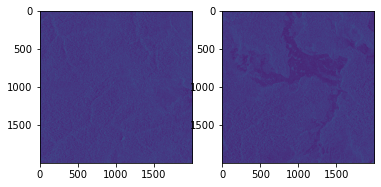

In [146]:
# Lets look at an amplitude chunk!
fig, ax = plt.subplots(1,2)
ax[0].imshow(intensity[1000:3000, 1000:3000])
ax[1].imshow(intensity[3001:5001, 3001:5001])

In [144]:
rl=slc_datacube.xrdataset['Real'][0].values
cmplx=slc_datacube.xrdataset['Complex'][0].values

In [147]:
# And we can crop the real and complex imagery, similarly to the GRD above.
crop_rl_tr = rl[1000:3000, 1000:3000]
crop_rl_tst = rl[3001:5001, 3001:5001]
crop_cl_tr = cmplx[1000:3000, 1000:3000]
crop_cl_tst = cmplx[3001:5001, 3001:5001]

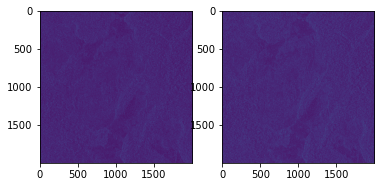

In [148]:
#Plot the complex/real image chips

fig, ax = plt.subplots(1,2)
ax[0].imshow(abs(crop_rl_tst))
ax[1].imshow(abs(crop_cl_tst))

Now, let's make a kmeans classifier that attempts to cluster the pixels by type to create a 'poor-mans' semantic segmentor. To use kmeans, we have to typically flatten the 2D array to 1D.

In [150]:
rl_f_tr=crop_rl_tr.flatten().reshape(-1, 1)     #for k-means must be 1D
rl_f_tst=crop_rl_tst.flatten().reshape(-1, 1)     #for k-means must be 1D

cl_f_tr=crop_cl_tr.flatten().reshape(-1, 1)     #for k-means must be 1D
cl_f_tst=crop_cl_tst.flatten().reshape(-1, 1)     #for k-means must be 1D

in_f_tst=intensity[3001:5001, 3001:5001].flatten().reshape(-1, 1)
#cmplx_f=cmplx.flatten().reshape(-1, 1)

In [151]:
clt = KMeans(n_clusters = 10,random_state=0)   #no clue how many clusters! I am just lazy and don't want to label the data. 
k=clt.fit(in_f_tst)    #you can change to any of the other data types like the complex data here.


In [152]:
out=k.fit_predict(in_f_tst)

/var/folders/7r/fyfh8zx51ls6yt8t_jppnz3c0000gq/T/ipykernel_18050/2653913360.py:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  io.imshow(color.label2rgb(out.reshape(2000,2000)))


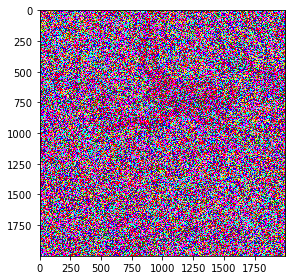

In [153]:
from skimage import color
from skimage import io
io.imshow(color.label2rgb(out.reshape(2000,2000)))


We may not have learned anything scientific from the exercise, but now you can perhaps do actual work with these arrays. 

hyvää työtä